# Import and Setup

Adjust cell width to view more content

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Import general packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import datetime
from matplotlib.patches import Rectangle
import pandas as pd
from scipy.optimize import curve_fit

# Analysis
We currently have about 760 PSI of xenon gas stored in our xenon storage cylinder 2.  

In [3]:
File = glob.glob('/gpfs/loomis/project/david_moore/aj487/purity_monitor/data/xe_pressure_vs_density*')[0]
print(File)
data = pd.read_csv(File, sep=",")
data.columns = ['Density', 'Pressure']

/gpfs/loomis/project/david_moore/aj487/purity_monitor/data/xe_pressure_vs_density.txt


In [4]:
def bar2psi(x): 
    return x*14.503773773
def psi2bar(x): 
    return x/14.503773773

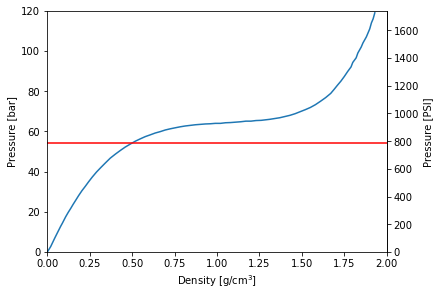

In [5]:
fig, ax = plt.subplots(constrained_layout=True)
plt.plot(data['Density'], data['Pressure'])
plt.xlim(0,2)
plt.ylim(0,120)
plt.xlabel('Density [g/cm$^3$]')
plt.ylabel('Pressure [bar]')
secax = ax.secondary_yaxis('right', functions=(bar2psi, psi2bar))
secax.set_ylabel('Pressure [PSI]')
plt.axhline(psi2bar(790), color='red')

In [6]:
def func(x,a,b,c,d,e,f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x**1 + f

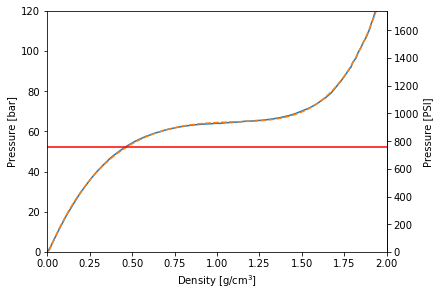

In [7]:
popt, pcov = curve_fit(func, data['Density'], data['Pressure'])
# print(popt, pcov)
xfit = np.linspace(0.01,2.3,1000)

fig, ax = plt.subplots(constrained_layout=True)
plt.plot(data['Density'], data['Pressure'])
plt.plot(xfit, func(xfit,*popt), ls='--')
plt.xlim(0,2)
plt.ylim(0,120)
plt.xlabel('Density [g/cm$^3$]')
plt.ylabel('Pressure [bar]')
secax = ax.secondary_yaxis('right', functions=(bar2psi, psi2bar))
secax.set_ylabel('Pressure [PSI]')
plt.axhline(psi2bar(760), color='red')

In [13]:
fitdata = func(xfit,*popt)
diff = np.abs(fitdata-psi2bar(790))
cut = np.where(diff == np.min(diff))
print(cut)
print(xfit[cut])
print(func(xfit[cut],*popt))

(array([219]),)
[0.51201201]
[54.44379103]


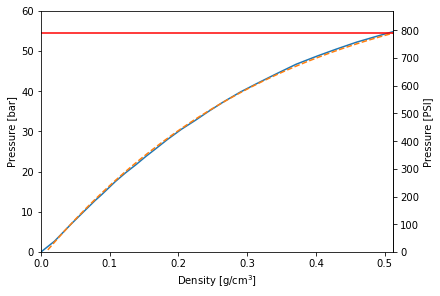

In [21]:
fig, ax = plt.subplots(constrained_layout=True)
plt.plot(data['Density'], data['Pressure'])
plt.plot(xfit, func(xfit,*popt), ls='--')
plt.xlim(0,xfit[cut])
plt.ylim(0,func(xfit[cut],*popt))
plt.ylim(0,60)
plt.xlabel('Density [g/cm$^3$]')
plt.ylabel('Pressure [bar]')
secax = ax.secondary_yaxis('right', functions=(bar2psi, psi2bar))
secax.set_ylabel('Pressure [PSI]')
plt.axhline(psi2bar(790), color='red')

Flange diameter is 76.2mm and height is 180mm

In [15]:
flange_volume = np.pi * (76.2/2.0)**2 * 180 / 1000 / 1000 # in L 
print(flange_volume)

0.8208661161379464


Liquid xenon density is 3.1 g/mL or 3.1 g/cm^3 and the volume of the xenon storage cylinder is 3.8 liters or 3800 mL

In [16]:
sum_density = xfit[cut][0]
sum_mass = sum_density*3800.0
lxe_volume = sum_mass/3.1/1000
print(lxe_volume)

0.6276276276276277


In [17]:
fill_height = lxe_volume/flange_volume * 180
print('If chamber was empty we could fill up to %.1f cm of liquid xenon' % (fill_height/10.0))

If chamber was empty we could fill up to 13.8 cm of liquid xenon
